# Notebook Contents
- Importing The Dependencies
- Loading The Dataset
- Exploratory Data Analysis (EDA)
- Save Clean Version of The Dataset
- Conclusion

### Importing The Dependencies

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from helpers import subplot_numerical_distributions, plot_categorical_feature, plot_categorical_counts

import warnings
warnings.filterwarnings("ignore")

### Loading The Dataset

In [2]:
MAIN_DIR = "../datasets"
df = pd.read_excel(f'{MAIN_DIR}/row_hotels_dataset.xlsx')

### Exploratory Data Analysis (EDA)

- In this section, we will explore and inspect the dataset to uncover insights, detect issues, and guide the subsequent data cleaning and machine learning steps.

- EDA serves as a mathematical and analytical approach to understand the dataset's structure, distributions, and relationships.

In [3]:
df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(83590, 31)

- \# of rows: 83590
- \# of columns: 31

In [5]:
df.isna().sum()

ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [6]:
df.isna().sum() / len(df) * 100

ID                      0.000000
Nationality             0.000000
Age                     4.520876
DaysSinceCreation       0.000000
NameHash                0.000000
DocIDHash               0.000000
AverageLeadTime         0.000000
LodgingRevenue          0.000000
OtherRevenue            0.000000
BookingsCanceled        0.000000
BookingsNoShowed        0.000000
BookingsCheckedIn       0.000000
PersonsNights           0.000000
RoomNights              0.000000
DaysSinceLastStay       0.000000
DaysSinceFirstStay      0.000000
DistributionChannel     0.000000
MarketSegment           0.000000
SRHighFloor             0.000000
SRLowFloor              0.000000
SRAccessibleRoom        0.000000
SRMediumFloor           0.000000
SRBathtub               0.000000
SRShower                0.000000
SRCrib                  0.000000
SRKingSizeBed           0.000000
SRTwinBed               0.000000
SRNearElevator          0.000000
SRAwayFromElevator      0.000000
SRNoAlcoholInMiniBar    0.000000
SRQuietRoo

- Looks we are gonna deal with missing values in the dataset.
- `Age` column hase almost 4.52% of missing values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

In [8]:
# Fill age missing valeus 
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [9]:
df.isna().sum()

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
NameHash                0
DocIDHash               0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

- Now our missing values are handled.

In [10]:
df.nunique().to_frame("Number of Unique Values").sort_values("Number of Unique Values", ascending=False)

,Number of Unique Values
ID,83590
NameHash,80642
DocIDHash,76993
LodgingRevenue,10257
OtherRevenue,4490
DaysSinceFirstStay,1108
DaysSinceLastStay,1105
DaysSinceCreation,1095
AverageLeadTime,418
Nationality,188


- looks like `ID`, `NameHash`, and `DocIDHash` columns have no importance. May be we are gonna dop them.

In [11]:
df.drop(columns = ["ID", "NameHash", "DocIDHash"], inplace = True)

In [12]:
df.head()

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,PRT,51.000000,150,45,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,0,0,0,0
1,PRT,45.398028,1095,61,280.0,53.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
2,DEU,31.000000,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FRA,60.000000,1095,93,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
4,FRA,51.000000,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


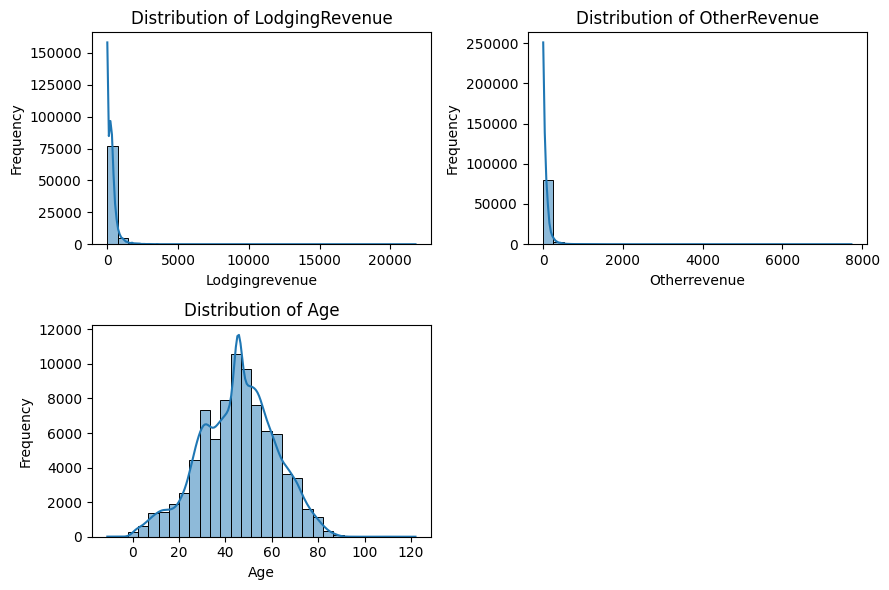

In [13]:
group_1_numerical_columns = ["LodgingRevenue", "OtherRevenue", "Age"]
subplot_numerical_distributions(df, group_1_numerical_columns)

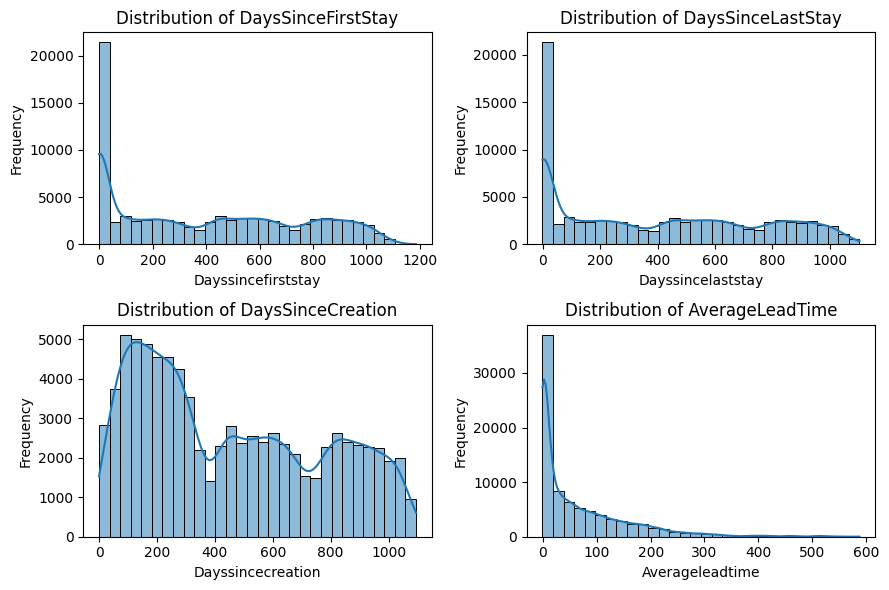

In [14]:
group_2_numerical_columns = ["DaysSinceFirstStay", "DaysSinceLastStay", "DaysSinceCreation", "AverageLeadTime"]
subplot_numerical_distributions(df, group_2_numerical_columns)

- From these distributions i see that some data can't to be in negative values, so i will fix it. 

In [15]:
# Fix expected issues in some numerical columns 
# Age
df.loc[df['Age'] < 0, 'Age'] = np.nan
df.loc[df['Age'] > 100, 'Age'] = np.nan
# AverageLeadTime
df.loc[df['AverageLeadTime'] < 0, 'AverageLeadTime'] = np.nan

# DaysSinceLastStay
df.loc[df['DaysSinceLastStay'] < 0, 'DaysSinceLastStay'] = np.nan

# DaysSinceFirstStay
df.loc[df['DaysSinceFirstStay'] < 0, 'DaysSinceFirstStay'] = np.nan

# DaysSinceCreation
df.loc[df['DaysSinceCreation'] < 0, 'DaysSinceCreation'] = np.nan

In [16]:
df.isna().sum() / len(df) * 100

Nationality              0.000000
Age                      0.029908
DaysSinceCreation        0.000000
AverageLeadTime          0.011963
LodgingRevenue           0.000000
OtherRevenue             0.000000
BookingsCanceled         0.000000
BookingsNoShowed         0.000000
BookingsCheckedIn        0.000000
PersonsNights            0.000000
RoomNights               0.000000
DaysSinceLastStay       23.830602
DaysSinceFirstStay      23.830602
DistributionChannel      0.000000
MarketSegment            0.000000
SRHighFloor              0.000000
SRLowFloor               0.000000
SRAccessibleRoom         0.000000
SRMediumFloor            0.000000
SRBathtub                0.000000
SRShower                 0.000000
SRCrib                   0.000000
SRKingSizeBed            0.000000
SRTwinBed                0.000000
SRNearElevator           0.000000
SRAwayFromElevator       0.000000
SRNoAlcoholInMiniBar     0.000000
SRQuietRoom              0.000000
dtype: float64

-  We got some missing values in the numerical columns, so we will fill them with the mean of the column. 

In [17]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["AverageLeadTime"] = df["AverageLeadTime"].fillna(df["AverageLeadTime"].mean())
df["DaysSinceLastStay"] = df["DaysSinceLastStay"].fillna(df["DaysSinceLastStay"].mean())
df["DaysSinceFirstStay"] = df["DaysSinceFirstStay"].fillna(df["DaysSinceFirstStay"].mean())
df["DaysSinceCreation"] = df["DaysSinceCreation"].fillna(df["DaysSinceCreation"].mean())

In [18]:
df.isna().sum()

Nationality             0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

- We get ride of missing values after filling them.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nationality           83590 non-null  object 
 1   Age                   83590 non-null  float64
 2   DaysSinceCreation     83590 non-null  float64
 3   AverageLeadTime       83590 non-null  float64
 4   LodgingRevenue        83590 non-null  float64
 5   OtherRevenue          83590 non-null  float64
 6   BookingsCanceled      83590 non-null  int64  
 7   BookingsNoShowed      83590 non-null  int64  
 8   BookingsCheckedIn     83590 non-null  int64  
 9   PersonsNights         83590 non-null  int64  
 10  RoomNights            83590 non-null  int64  
 11  DaysSinceLastStay     83590 non-null  float64
 12  DaysSinceFirstStay    83590 non-null  float64
 13  DistributionChannel   83590 non-null  object 
 14  MarketSegment         83590 non-null  object 
 15  SRHighFloor        

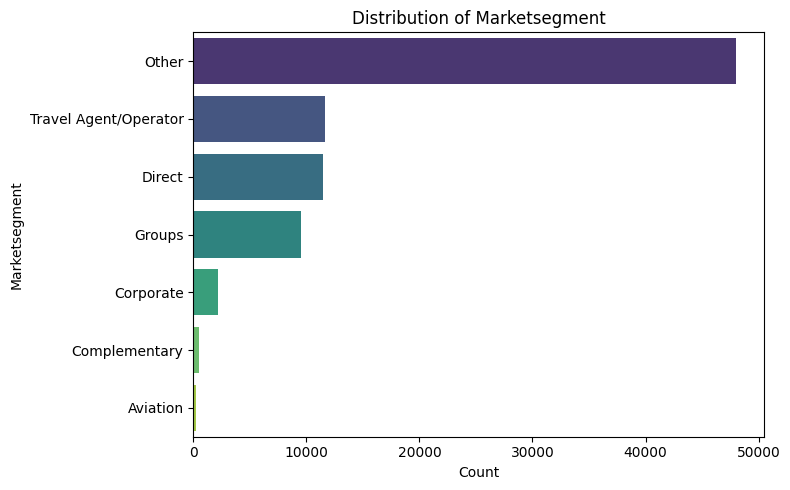

In [20]:
plot_categorical_feature(df, "MarketSegment")

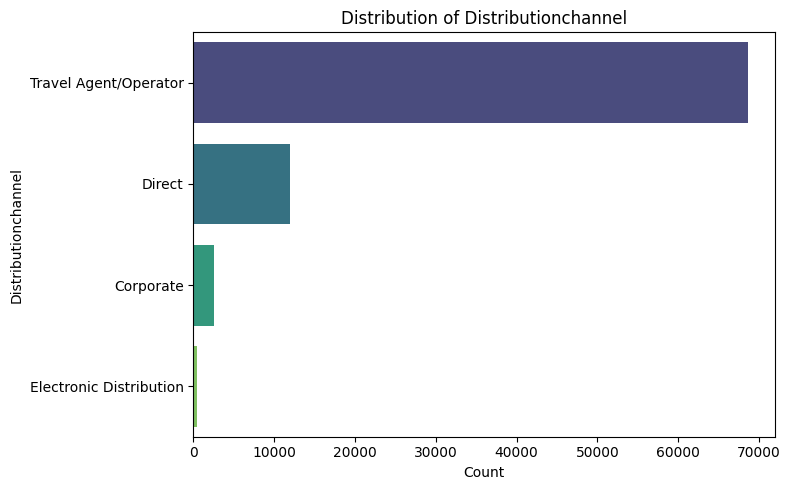

In [21]:
plot_categorical_feature(df, "DistributionChannel")

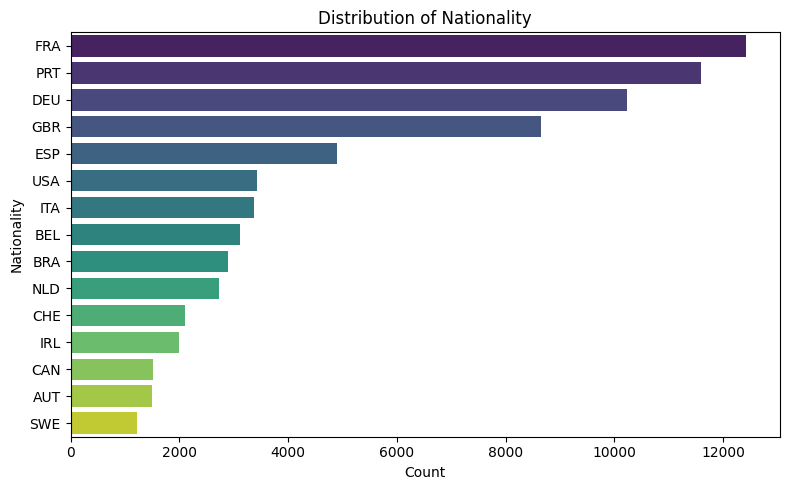

In [22]:
plot_categorical_feature(df, "Nationality",15)

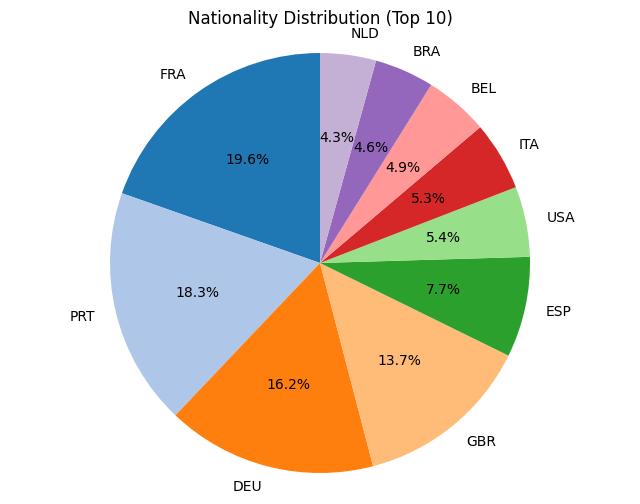

In [23]:
top_k = 10
nationalty_value_counts = df["Nationality"].value_counts().head(top_k)
plt.figure(figsize=(8, 6))
plt.pie(
    nationalty_value_counts,
    labels=nationalty_value_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.tab20.colors
)
plt.title(f"Nationality Distribution (Top {top_k})")
plt.axis('equal') 
plt.show()

In [24]:
# Convert the data type object to cartegory
df["Nationality"] = df["Nationality"].astype("category")
df["DistributionChannel"] = df["DistributionChannel"].astype("category")
df["MarketSegment"] = df["MarketSegment"].astype("category")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Nationality           83590 non-null  category
 1   Age                   83590 non-null  float64 
 2   DaysSinceCreation     83590 non-null  float64 
 3   AverageLeadTime       83590 non-null  float64 
 4   LodgingRevenue        83590 non-null  float64 
 5   OtherRevenue          83590 non-null  float64 
 6   BookingsCanceled      83590 non-null  int64   
 7   BookingsNoShowed      83590 non-null  int64   
 8   BookingsCheckedIn     83590 non-null  int64   
 9   PersonsNights         83590 non-null  int64   
 10  RoomNights            83590 non-null  int64   
 11  DaysSinceLastStay     83590 non-null  float64 
 12  DaysSinceFirstStay    83590 non-null  float64 
 13  DistributionChannel   83590 non-null  category
 14  MarketSegment         83590 non-null  category
 15  SR

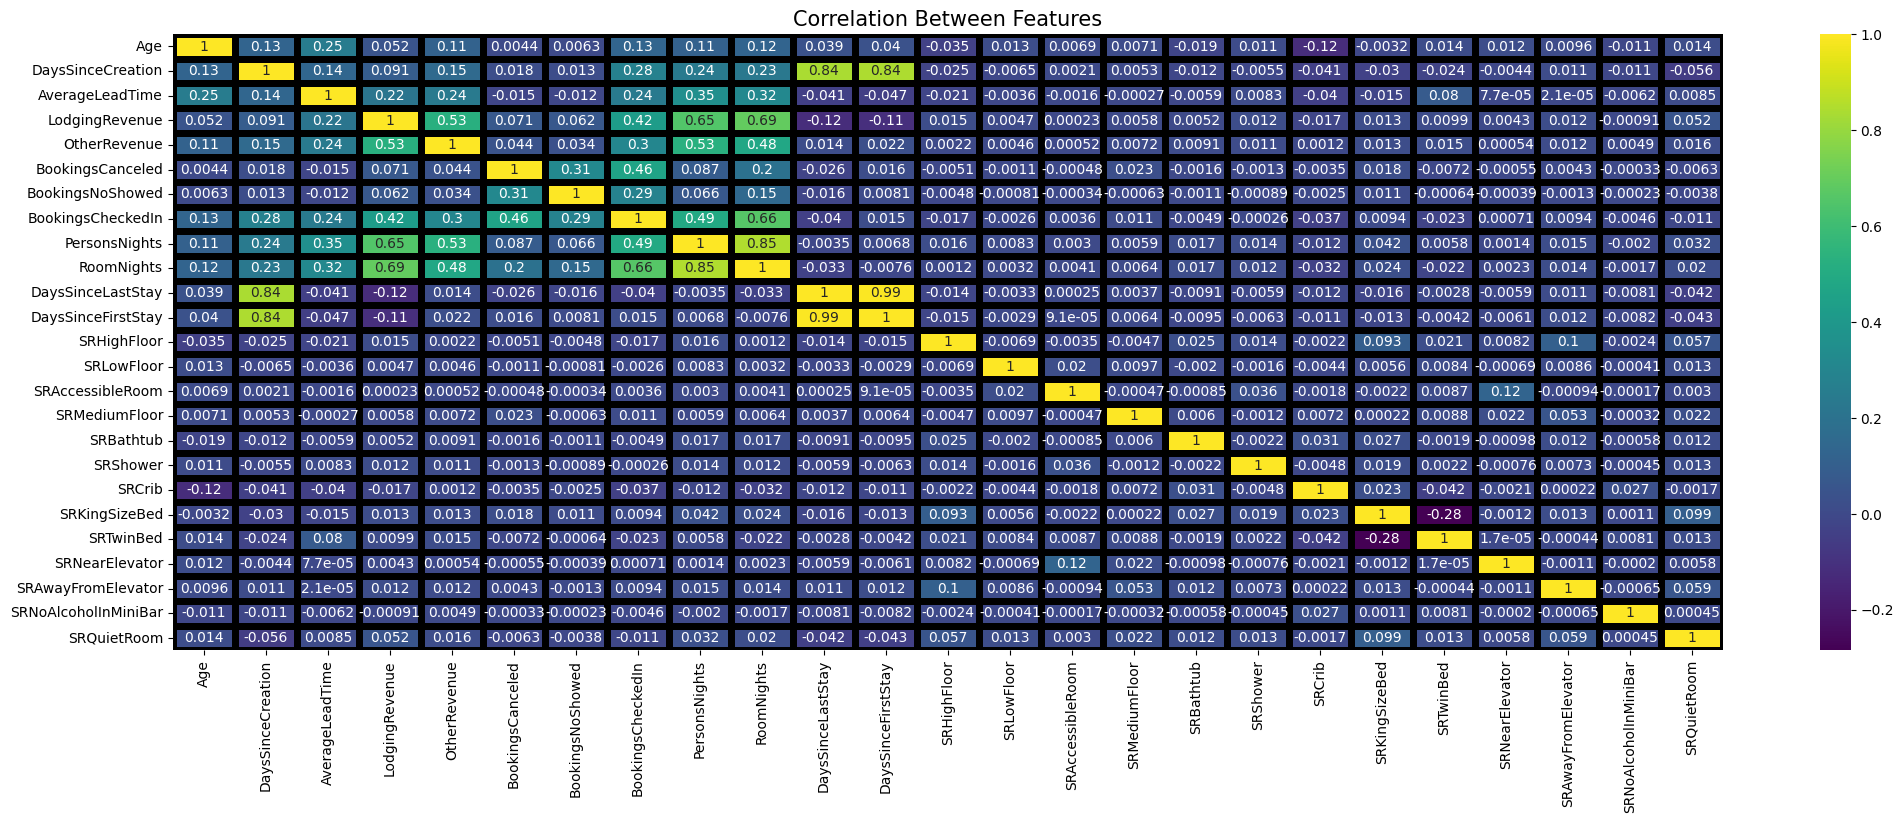

In [26]:
plt.figure(figsize=(25,8))
sns.heatmap(df.corr(numeric_only = True),cmap="viridis", annot = True, linecolor="k", linewidths = 5)
plt.title('Correlation Between Features', fontsize=15)
plt.show()

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,83590.0,45.402204,16.162222,0.0,34.0,45.398028,56.000,96.00
DaysSinceCreation,83590.0,453.640902,313.390291,0.0,177.0,397.000000,723.000,1095.00
AverageLeadTime,83590.0,66.204068,87.755912,0.0,0.0,29.000000,103.000,588.00
LodgingRevenue,83590.0,298.802087,372.851892,0.0,59.0,234.000000,402.000,21781.00
OtherRevenue,83590.0,67.589132,114.327776,0.0,2.0,38.500000,87.675,7730.25
BookingsCanceled,83590.0,0.002022,0.066770,0.0,0.0,0.000000,0.000,9.00
BookingsNoShowed,83590.0,0.000634,0.029545,0.0,0.0,0.000000,0.000,3.00
BookingsCheckedIn,83590.0,0.794617,0.695778,0.0,1.0,1.000000,1.000,66.00
PersonsNights,83590.0,4.649133,4.567673,0.0,1.0,4.000000,6.000,116.00
RoomNights,83590.0,2.358536,2.281746,0.0,1.0,2.000000,4.000,185.00


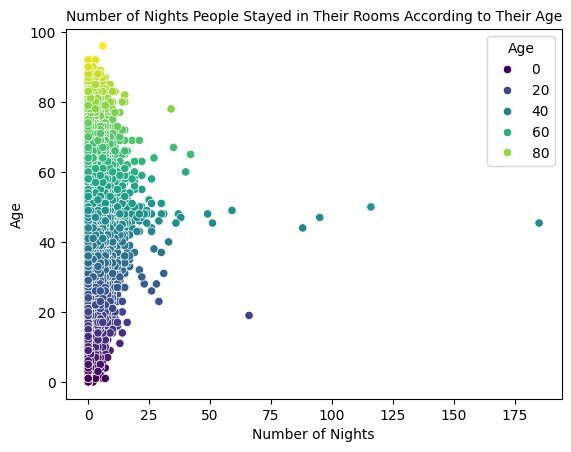

In [28]:
sns.scatterplot(x="RoomNights", y="Age",
              hue="Age",
              data=df, palette = "viridis")
plt.title('Number of Nights People Stayed in Their Rooms According to Their Age', fontsize = 10)
plt.xlabel('Number of Nights')
plt.ylabel('Age')
plt.show()

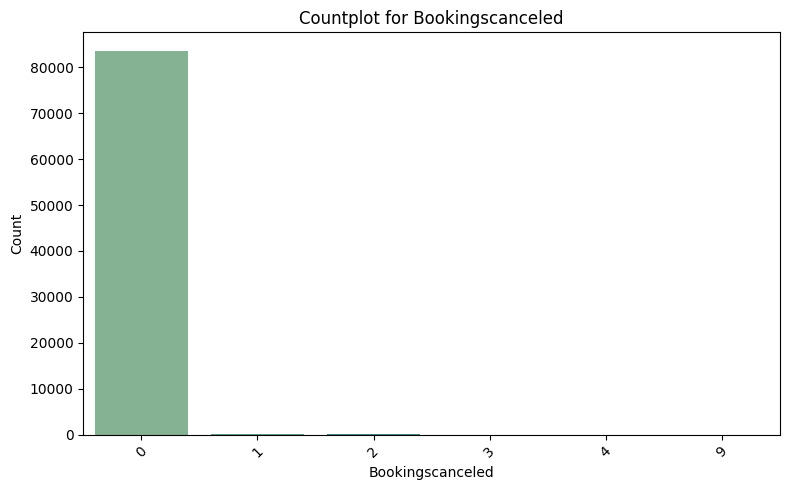

In [29]:
plot_categorical_counts(df, "BookingsCanceled")

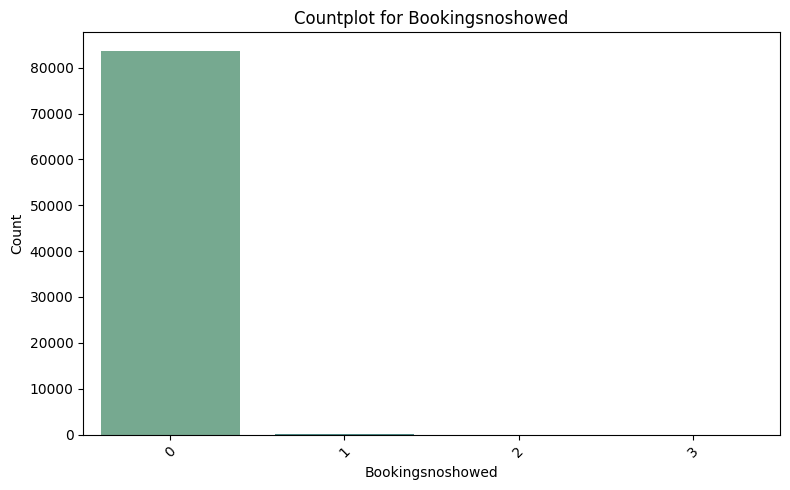

In [30]:
plot_categorical_counts(df, "BookingsNoShowed")

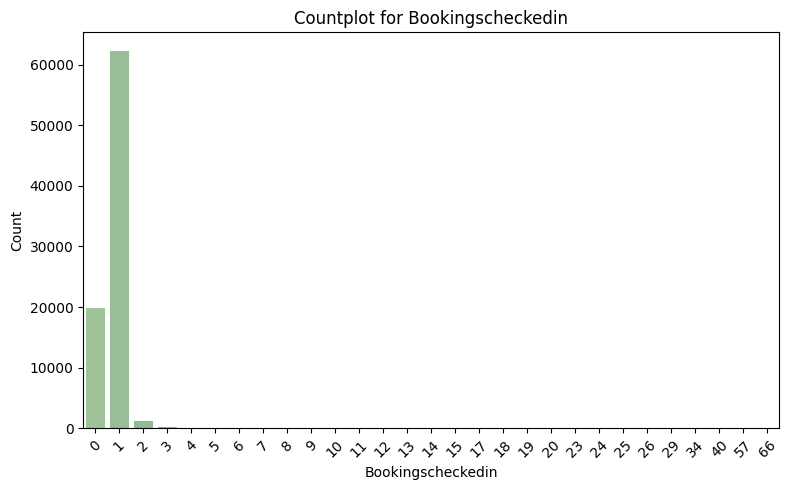

In [31]:
plot_categorical_counts(df, "BookingsCheckedIn")

In [32]:
df.head()

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,PRT,51.000000,150.0,45.0,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,0,0,0,0
1,PRT,45.398028,1095.0,61.0,280.0,53.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
2,DEU,31.000000,1095.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FRA,60.000000,1095.0,93.0,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
4,FRA,51.000000,1095.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- From previous analysis i see that Nationality, and DistributionChannel are not useful for the next steps of ML.

In [39]:
df.drop(columns = ["Nationality", "DistributionChannel"], inplace=True)

- Encoding the MarketSegment column using OneHotEncoder required mathematically to convert the categorical data into a numerical format that can be used in machine learning models.

In [64]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first")
encoded_array = encoder.fit_transform(df[["MarketSegment"]])
encoded_market_segmet_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(["MarketSegment"]))

In [65]:
encoded_market_segmet_df.head()

,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [66]:
df = pd.concat([df, encoded_market_segmet_df], axis=1)

In [67]:
df.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,51.000000,150.0,45.0,371.0,105.3,1,0,3,8,5,...,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
1,45.398028,1095.0,61.0,280.0,53.0,0,0,1,10,5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,31.000000,1095.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,60.000000,1095.0,93.0,240.0,60.0,0,0,1,10,5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,51.000000,1095.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


### Save Clean Version of The Dataset

In [68]:
df.to_excel(f"{MAIN_DIR}/cleaned_hotels_dataset.xlsx")

### Conclusion

- **Dataset Overview**  
  - Total records: **83,590**  
  - Total features: **31**  

- **Missing Values Handling**  
  - `Age` column contained ~**4.52%** missing values.  
  - Missing values in numerical columns were filled with the column mean.  
  - All missing values were successfully handled.

- **Feature Relevance**  
  - Columns `ID`, `NameHash`, and `DocIDHash` were found to have no analytical importance.  
  - These features are candidates for removal to simplify the dataset.

- **Data Quality Issues**  
  - Certain columns contained **invalid negative values** that were not logically possible.  
  - Negative values were corrected to maintain consistency.

- **Final Dataset State**  
  - No missing values remain.  
  - Data is now clean, consistent, and ready for further analysis or modeling.

- **Outcome**  
  - EDA provided valuable insights into dataset structure and quality. 
  - I see that the data gonna be computationally complex, but i think about handling that in the next notebbok for preporcessing.